
# Project: Investigate a Dataset - [TMDB Movies Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Alot of columns are provided that describe too many aspects of data like date of release, genre, revenue, budget, cast director and much other information


### Question(s) for Analysis
This dataset is very interesting. It has a lot of questions that can be asked. 

What is the most genres of movies that were produced?  

What is the movie with the highest adjusted revenue?

Is there a relation between the average user reviews of a movie and its revenue?  

Is there a relation between the budget of a movie and its revenue?

Are popularlarity and revenue correlated in movies?  

In high revenue movies, what are the most geners present?  

What are the main characteristics of the high revenue movies when compared to the other movies?  

Is the movies industry expanding through the years by the mean of count or is it shrinking?  

Who is the director with the most sum of revenues?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
%matplotlib inline



In [2]:
#A predefined function for labelling the visualisations through the code

def label(x,y,t):
    """
    x(str):X-axis label
    y(str):Y-axis label
    t(str):Title of the visualisation
    No return
    """
    plt.xlabel(x);
    plt.ylabel(y);
    plt.title(t);
    plt.show();

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.4MB/s eta 0:00:01   46% |███████████████                 | 4.9MB 27.3MB/s eta 0:00:01    73% |███████████████████████▍        | 7.6MB 27.6MB/s eta 0:00:01    86% |███████████████████████████▋    | 9.0MB 29.0MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 3.1MB/s eta 0:00:01   24% |███████▊                        | 3.2MB 23.8MB/s eta 0:00:01    43% |█████████████▉                  | 5.8MB 26.0MB/s eta 0:00:01    52% |█████████████████               | 7.1MB 26.0MB/s eta 0:00:01    62% |████████████████████            | 8.4MB 26.9MB/s eta 0:00:01    72% |███████████████████████         | 9.6MB 25.6MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully unins

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
First of all we need to check the given data by checking what are the headers of the columns.  
Also, we need to check if there are null value, and if they are in importat rows in the analysis or not.  
getting some description of the cells contents is also benefecial. May be there is false data in the content

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
print(df.head())



       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [5]:
#Getting dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
#Getting Dataset description
print(df.describe())

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

In [7]:
#Getting Dataset duplicated number
print(df.duplicated().sum())


1



### Data Cleaning
- One good thing about our dataset that it is relatively large. We can get reasonable results with a subset from it.  
- It was clear from the description of the columns that more than half of the movies have zero value in the budget and the revenue.  
- I didn't see that filling them with the mean values will give us good results (specially that movie revenues vary in a huge manner).  
- I believe that discarding these rows will make the results more indicative to the reality specially that we already have a large set of movies. so a subset will be also indicative for our analysis  
-  Also we have a small amount of movies with zero runtime. I think the better will be filling them with the mean value.  
-  Several columns include null values, but most of them include data that will not be very beneficial in my intended analysis like "homepage","overview","tagline","keywords","cast","imdb_id" and "production_companies". Another column of the "id" does not seem to be very importat since we have the title as the unique identifier of the movie.  
- Fortunately we have only 1 duplicated value that will be eleminated.
 

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#First of all discarding zero revenue and budget movies
df=df[df['revenue']!=0]
df=df[df['budget']!=0]
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 21 columns):
id                      3855 non-null int64
imdb_id                 3855 non-null object
popularity              3855 non-null float64
budget                  3855 non-null int64
revenue                 3855 non-null int64
original_title          3855 non-null object
cast                    3851 non-null object
homepage                1426 non-null object
director                3854 non-null object
tagline                 3575 non-null object
keywords                3717 non-null object
overview                3855 non-null object
runtime                 3855 non-null int64
genres                  3855 non-null object
production_companies    3809 non-null object
release_date            3855 non-null object
vote_count              3855 non-null int64
vote_average            3855 non-null float64
release_year            3855 non-null int64
budget_adj              3855 non-null flo

### After the first cleaning wave
- We have 3855 values left. The good thing that the elemination solved some of the other problems like the movie with a zero runtime.  
-  Now we will continue cleaning by discarding the duplicated row and discarding the not needed columns.

In [9]:
#discarding the duplicated row and checking the result
df.drop_duplicates(inplace = True)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 21 columns):
id                      3854 non-null int64
imdb_id                 3854 non-null object
popularity              3854 non-null float64
budget                  3854 non-null int64
revenue                 3854 non-null int64
original_title          3854 non-null object
cast                    3850 non-null object
homepage                1426 non-null object
director                3853 non-null object
tagline                 3574 non-null object
keywords                3716 non-null object
overview                3854 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null object
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
budget_adj              3854 non-null flo

### The number decreased by the 1 duplicated movie which is Teken movie
- Next we will remove the unwanted columns

In [10]:
#Dropping the unwanted columns
df.drop(["homepage","overview","tagline","keywords","cast","imdb_id", "id" , "production_companies"], axis = 1, inplace = True)
print(df.head())


   popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

           director  runtime                                     genres  \
0   Colin Trevorrow      124  Action|Adventure|Science Fiction|Thriller   
1     George Miller      120  Action|Adventure|Science Fiction|Thriller   
2  Robert Schwentke      119         Adventure|Science Fiction|Thriller   
3       J.J. Abrams      136   Action|Adventure|Science Fiction|Fantasy   
4         James Wan      137                      Action|Crime|Thriller   

  release_date  vote_count  vote_average  release_year    budget_adj  \
0       6/9/15        5562           6.5          2015  

### Converting the genres string into a list
- converting the genres into a list will be easier to use when trying to analyze the most yielding genres.  
- This part was googled and got from https://stackoverflow.com/questions/45758646/pandas-convert-string-into-list-of-strings but it was customized for sure to match our case


In [11]:
#Coverting genres string into a list
df.genres=df.genres.str[:].str.split('|').tolist()
print(df.head())


   popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

           director  runtime                                          genres  \
0   Colin Trevorrow      124  [Action, Adventure, Science Fiction, Thriller]   
1     George Miller      120  [Action, Adventure, Science Fiction, Thriller]   
2  Robert Schwentke      119          [Adventure, Science Fiction, Thriller]   
3       J.J. Abrams      136   [Action, Adventure, Science Fiction, Fantasy]   
4         James Wan      137                       [Action, Crime, Thriller]   

  release_date  vote_count  vote_average  release_year    budget_adj  \
0       6/9/15        5562

In [12]:
#checking the data after cleaning
df.info()
#we will need to eleminate a single null value from director
df=df.dropna()
#Checking again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 13 columns):
popularity        3854 non-null float64
budget            3854 non-null int64
revenue           3854 non-null int64
original_title    3854 non-null object
director          3853 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null object
vote_count        3854 non-null int64
vote_average      3854 non-null float64
release_year      3854 non-null int64
budget_adj        3854 non-null float64
revenue_adj       3854 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 421.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 13 columns):
popularity        3853 non-null float64
budget            3853 non-null int64
revenue           3853 non-null int64
original_title    3853 non-null object
director          3853 non-null object
runtime           38

<a id='eda'></a>
## Exploratory Data Analysis

We will begin by checking some general information about the movies.



### Research Question 1 (What are the most produced genres of movies)
- Googled plotting histograms from a column of lists https://stackoverflow.com/questions/58720556/how-to-plot-a-histogram-of-a-pandas-series-of-lists  then customization and visualisations were adjusted

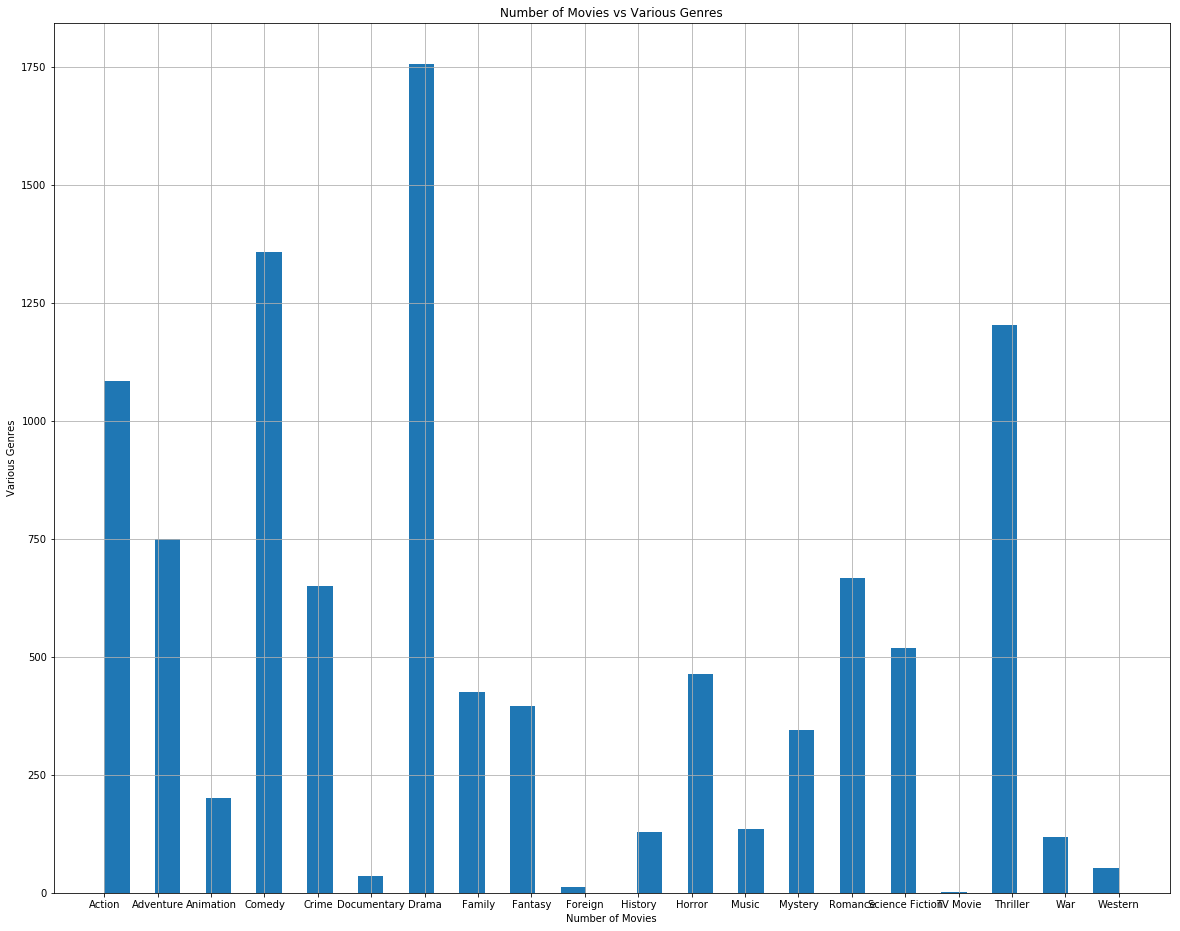

In [13]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

df['genres'].apply(Series).stack().hist( bins=40,figsize=(20,16));

label("Number of Movies","Various Genres","Number of Movies vs Various Genres")

- It is found that the most produces genres are Drama, Comedy, Thriller and Action

### Research Question 2  (What is the movie with the highest adjusted revenue?) 

In [73]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df['original_title'][df['revenue_adj'] == df['revenue_adj'].max()]

1386    Avatar
Name: original_title, dtype: object

- The movie with the highest revenue is Avatar

### Research Question 3  (Does the budget of the movie have an impact on its revenue?)

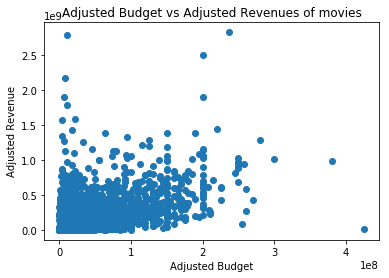

In [14]:
#Plotting budgets vs revenues
plt.scatter(df['budget'], df['revenue_adj'])

label("Adjusted Budget","Adjusted Revenue","Adjusted Budget vs Adjusted Revenues of movies")


- It is found that there is some correlation between the budget of a movie and its revenue, but it is not that strong correlation as many low budget movies could achieve high revenues

### Research Question 4  (Is the average rating of a movie correlated with its revenue?)

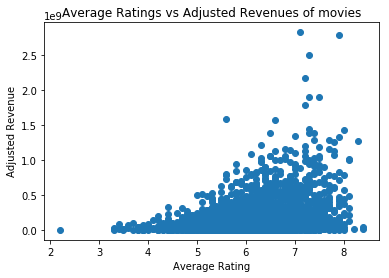

In [15]:
#Plotting average ratings vs revenues
plt.scatter(df['vote_average'], df['revenue_adj'])

label("Average Rating","Adjusted Revenue","Average Ratings vs Adjusted Revenues of movies")


- From the plot it is found that there is a higher correlation between the movie rating and it revenue than the movie budget and its revenue

### Research Question 5  (Are popularlarity and revenue correlated in movies?)

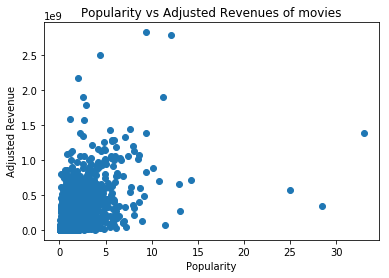

In [16]:
#Plotting average ratings vs revenues
plt.scatter(df['popularity'], df['revenue_adj'])

label("Popularity","Adjusted Revenue","Popularity vs Adjusted Revenues of movies")


- The popularity of the movie is correlated to the revenue but not as highly correlated  as the user ratings.

### Research Question 6  (In high revenue movies, what are the most geners present?)

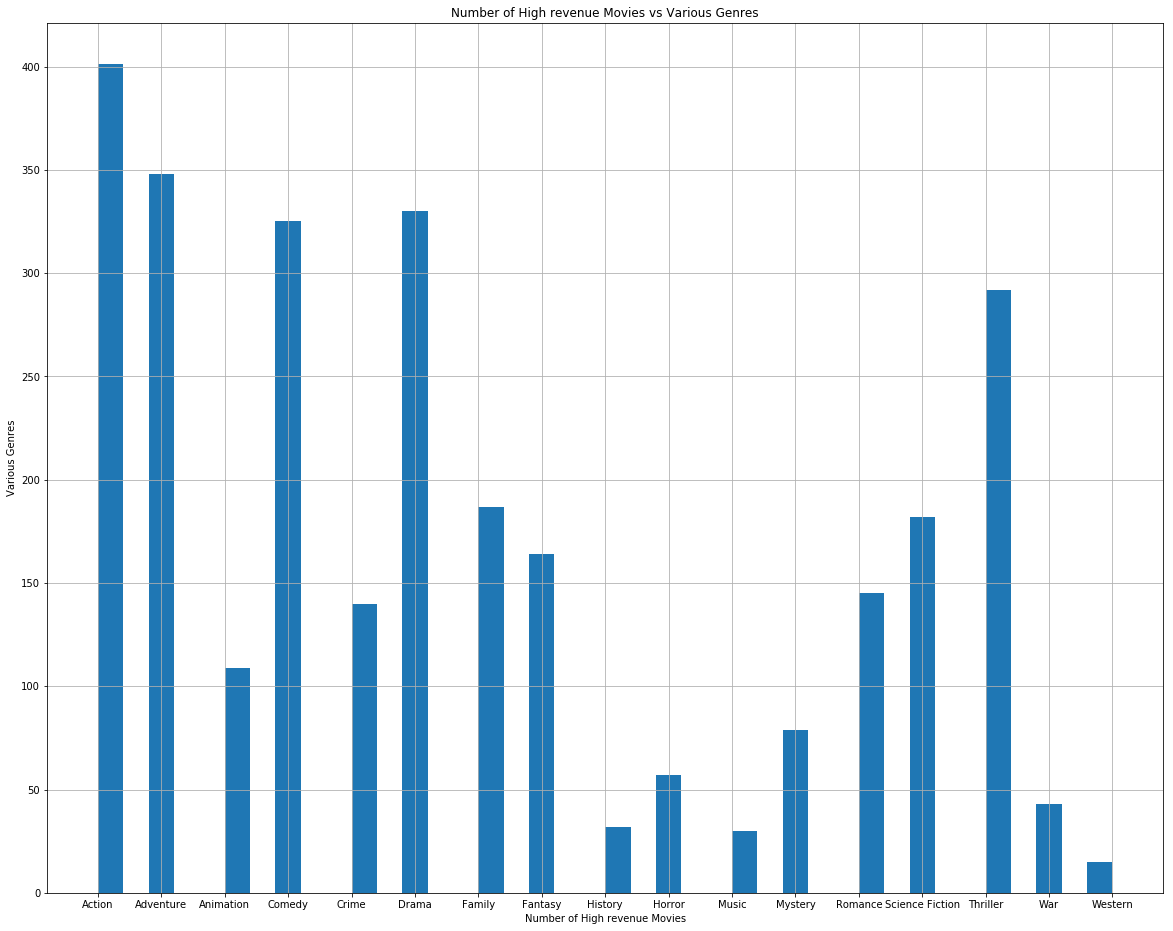

In [17]:
#Will create a sub dataset containg the highest 25% revenue movies to analyze
df_hi=df[df['revenue_adj']>= df['revenue_adj'].quantile(0.75)]
#will plot the histogram of the high revenue movies to get an idea of the high yielding geners
df_hi['genres'].apply(Series).stack().hist( bins=40,figsize=(20,16));

label("Number of High revenue Movies","Various Genres","Number of High revenue Movies vs Various Genres")

- Although the action movies count on the overall set of movies ranked 4th. It is the highest rank in the high revenue movies followed by adventure movies

### Research Question 7  (What are the main characteristics of the high revenue movies when compared to the other movies?)

In [18]:
#We will print the description of the overall movie set and compare it with the highest 25% movies set to reach conclusions
print(df.describe())
print(df_hi.describe())

        popularity        budget       revenue      runtime   vote_count  \
count  3853.000000  3.853000e+03  3.853000e+03  3853.000000  3853.000000   
mean      1.191825  3.721227e+07  1.077117e+08   109.208928   527.854399   
std       1.475258  4.221035e+07  1.765554e+08    19.912913   880.031643   
min       0.001117  1.000000e+00  2.000000e+00    15.000000    10.000000   
25%       0.462609  1.000000e+07  1.360940e+07    95.000000    71.000000   
50%       0.797723  2.400000e+07  4.480678e+07   106.000000   204.000000   
75%       1.368403  5.000000e+07  1.242721e+08   119.000000   580.000000   
max      32.985763  4.250000e+08  2.781506e+09   338.000000  9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count   3853.000000   3853.000000  3.853000e+03  3.853000e+03  
mean       6.168258   2001.259278  4.425038e+07  1.370974e+08  
std        0.795001     11.283517  4.481043e+07  2.161299e+08  
min        2.200000   1960.000000  9.693980e-01  2.370705e+

### We could find that the characteristics of the high revenue movies are the following:  
- Higher average popularity  
- Higher average budget  
- Higher average user reviews  
- Higher Average runtime  
- Higher vote count  

One of the most interesting outcomes is that the release year is not impacting the revenue that much because the average year of all the movies and the high revenue movies is almost the same

### Research Question 8  (Is the movies industry expanding through the years by the mean of count or is it shrinking?)

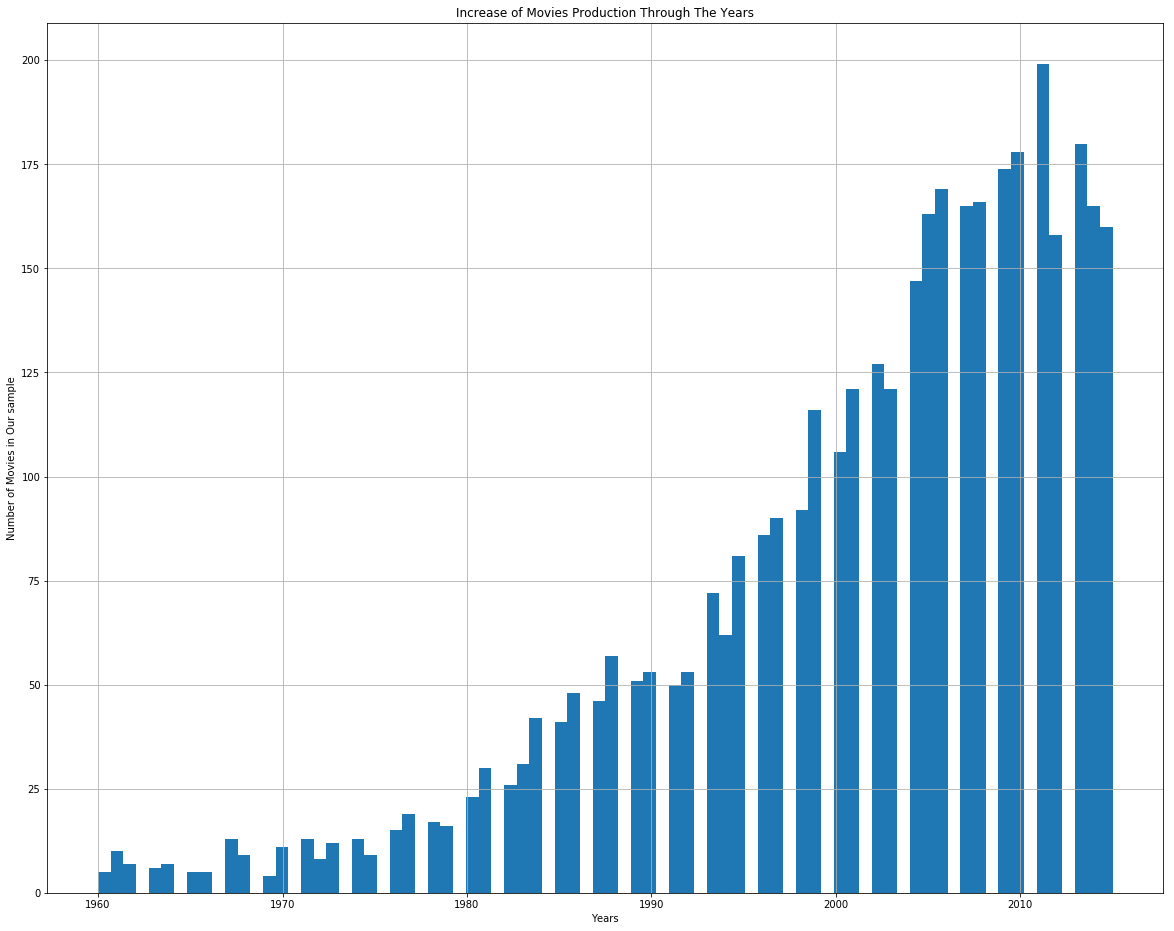

In [19]:
#Plotting a histogram for release years
df['release_year'].hist(bins=80,figsize=(20,16));

label("Years","Number of Movies in Our sample",'Increase of Movies Production Through The Years')

- It is very obvious that the movie industry is expanding through the years.

### Research Question 9  (Who is the movie director with highest sum of revenues in the list?)

In [20]:
df_director_tot_rev = df.groupby(['director'])['revenue_adj'].sum().reset_index()
df_director_tot_rev['director'][df_director_tot_rev['revenue_adj'] == df_director_tot_rev['revenue_adj'].max()]


1548    Steven Spielberg
Name: director, dtype: object

- As expected, the director with the highest sum of revenues in our dataset is Steven Spielberg

<a id='conclusions'></a>
## Conclusions  

## First of All Limitations:  
- Normally it is very hard to reach a 100% clean accurate and complete data. Some assumptions or neglections should be made as a part of cleaning the data before the analysis.  
-  In our analysis, our limitation came because there were alot of missing revenue and budget entries. And since most of our analysis was revenue oriented, a decision was made to eleminate all the movies with the missing  budget or revenue values. This left us analyzing only about one third of the dataset and might have had an impact on our results.
- Other people analyzing the dataset without caring about the budgets and revenues can eleminate their whole columns and get better analysis results (because they will be dealing with a bigger dataset), but this was not our case



### Our findings were mentioned along with the code, but here we will summarize the whole idea.
- First of all, since we have a large set of data, I preffered to elminate entries with false values like the zeros in the budget and revenues instead of applying the mean value.  
- Some analysis was done to know the most produced genre in the movies and it was found to be "Drama".  
- I knew previously that Avatar is the movie with the highest revenue ever, but I was curios to know if another movie if another movie could beat it after the inflation adjustment. But I found that it is still the highest.  
- It is found that there is some correlation between the budget of a movie and its revenue, but it is not that strong correlation as many low budget movies could achieve high revenues.  
- From the plot it is found that there is a higher correlation between the movie rating and it revenue than the movie budget and its revenue.  
- The popularity of the movie is correlated to the revenue but not as highly correlated  as the user ratings.  
- Although the action movies count on the overall set of movies ranked 4th. It is the highest rank in the high revenue movies followed by adventure movies.  
### We could find that the characteristics of the high revenue movies are the following:  
- Higher average popularity  
- Higher average budget  
- Higher average user reviews  
- Higher Average runtime  
- Higher vote count  

One of the most interesting outcomes is that the release year is not impacting the revenue that much because the average year of all the movies and the high revenue movies is almost the same.  

Another interesting piece of info is that the movies industry is widely expanding through the years with respect to count.  
- The highest yielding director for revenues is Steven Spielberg

### From the previous analysis. If you want to get a high revenue movie, consider increasing the budget, hiring Steven Spielber, and it will be better if the gener include action and adventure.



In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0